## 라이브러리 import 하기

In [1]:
import re 
import pandas as pd
#import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rc('font', family='NanumMyeongjo')

## 데이터 load 하기

In [2]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [3]:
data_path = './autoint/data/ml-1m'

In [4]:
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

### 데이터 users: user 정보
- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- gender: M or F
- age: 18세 이하는 1, 18 ~ 24세는 18, 25 ~ 34는 25 등과 같이 구성되어 있음
- occupation: 2는 artist, 8은 farmer 등으로 숫자값으로 매핑되어 있음

In [5]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### 데이터 ratings: rating 정보
- user_id: 1부터 6040으로, 익명의 정보로 되어 있음
- movie_id: 1부터 3952로, 익명의 정보로 되어 있음
- rating: 5점 평점
- timestamp: Unix timestamp로 되어 있음.

In [6]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 데이터 movies: movie 정보
- movie_id : 1부터 3952로, 익명의 정보로 되어 있음
- title: 영화 제목과 연도가 함께 입력되어 있음
- genres: Action, Comedy 등의 장르가 입력되어 있음

In [7]:
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## 데이터 분석
- 장르별 영화 수
- 연도별 영화 수
- 평점 분포
- 장르별 평점

### 1. 영화 데이터(movies)

In [8]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [9]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


#### ⭐ 장르별 영화 개수
- x축: 장르
- y축: 개수

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

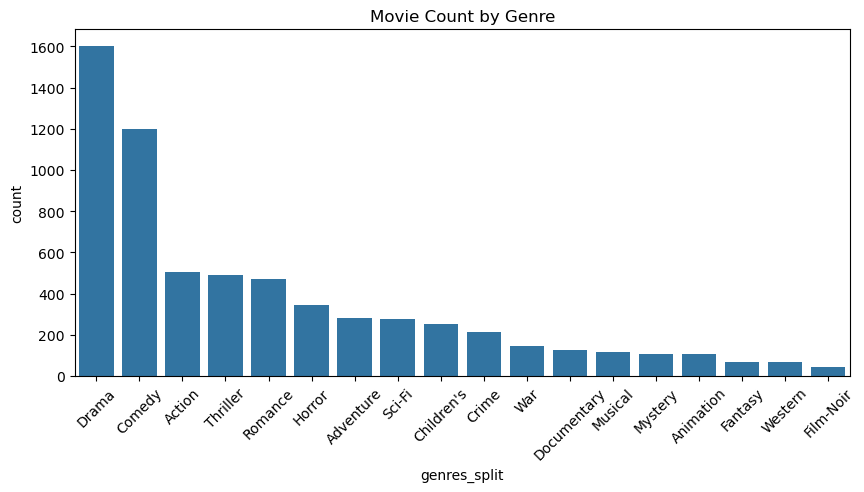

In [11]:
# seaborn 버전
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('Movie Count by Genre')
plt.xticks(rotation=45)
plt.show()

#### ⭐ 연도별 영화 개수
- x축: 연도
- y축: 영화의 개수

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

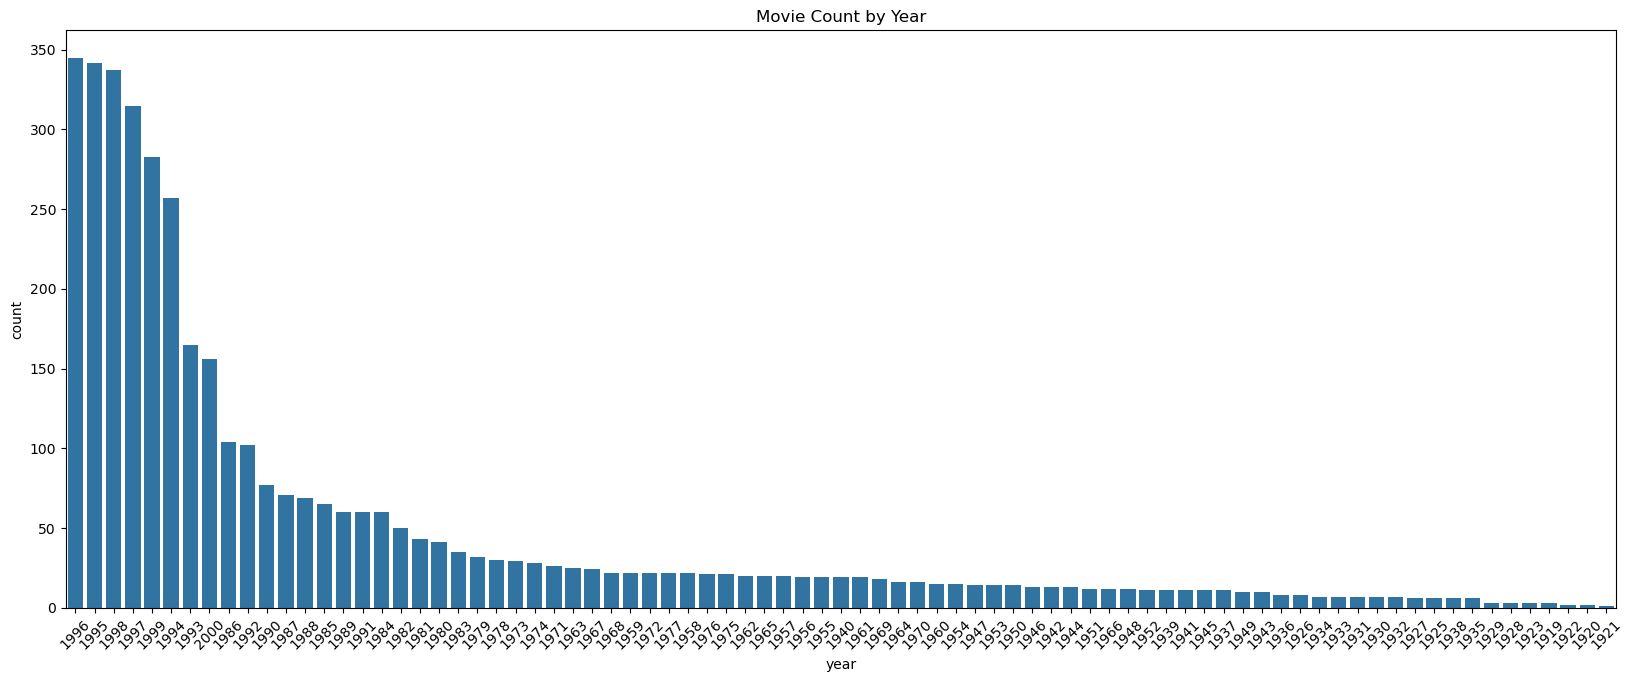

In [12]:
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('Movie Count by Year')
plt.xticks(rotation=45)
plt.show()

1995~2000년 사이의 영화가 가장 많다.

### 2. 평점 데이터(ratings)

In [13]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


#### ⭐ 평점 분포
- x축: 평균 평점
- y축: 개수

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

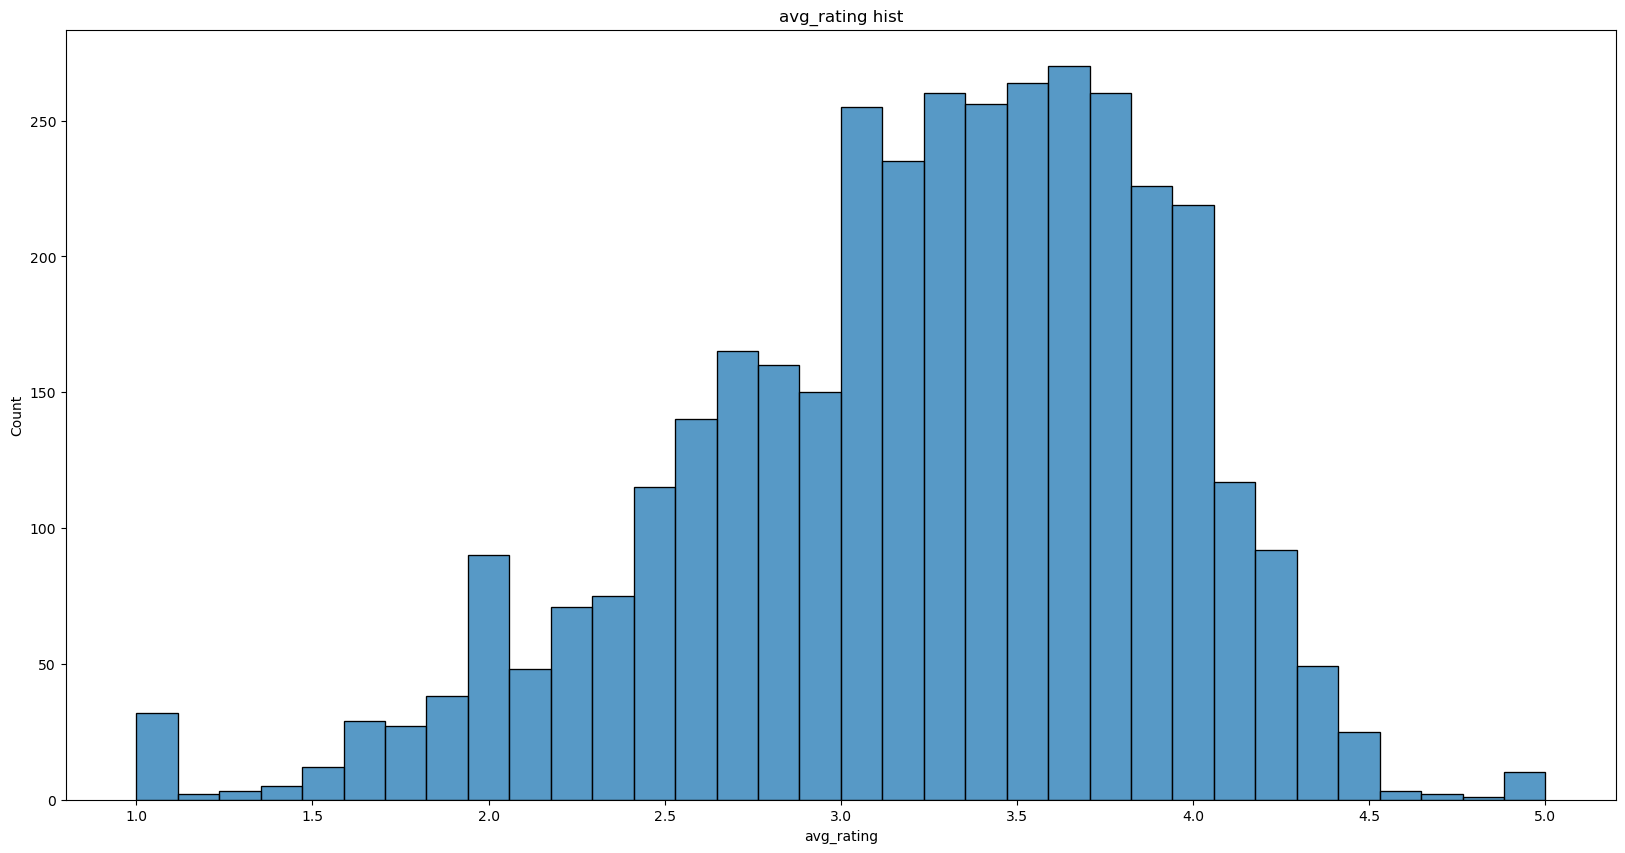

In [14]:
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('avg_rating hist')
plt.show()

### 3. 장르별 평점 분포

In [15]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


영화 평점 데이터와 영화 데이터를 합쳐준다.  
genres_split를 기준으로 groupby한다.  
groupby할 때 rating을 기준으로 평균과 개수를 뽑아낸다.  
rating과 mean을 기준으로 정렬한다.  

In [16]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [17]:
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

In [18]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [19]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]    
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


### 4. 장르별 평점 개수
- x축: 장르
- y축: 평점 개수 

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

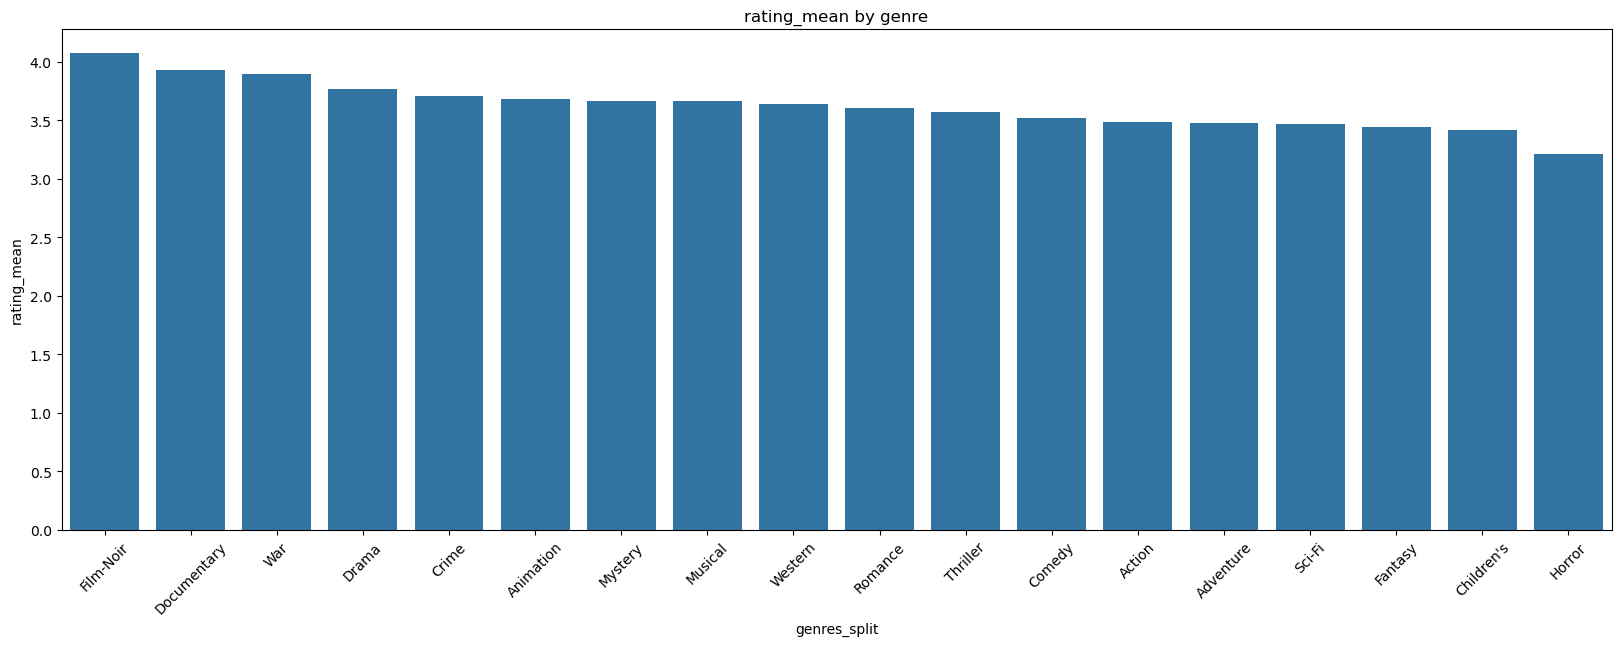

In [20]:
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('rating_mean by genre')
plt.xticks(rotation=45)
plt.show()

호러물은 다른 장르에 비해 낮은 평점을 가진다.  
다큐멘터리가 높은 평점을 가지고 있다.

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font famil

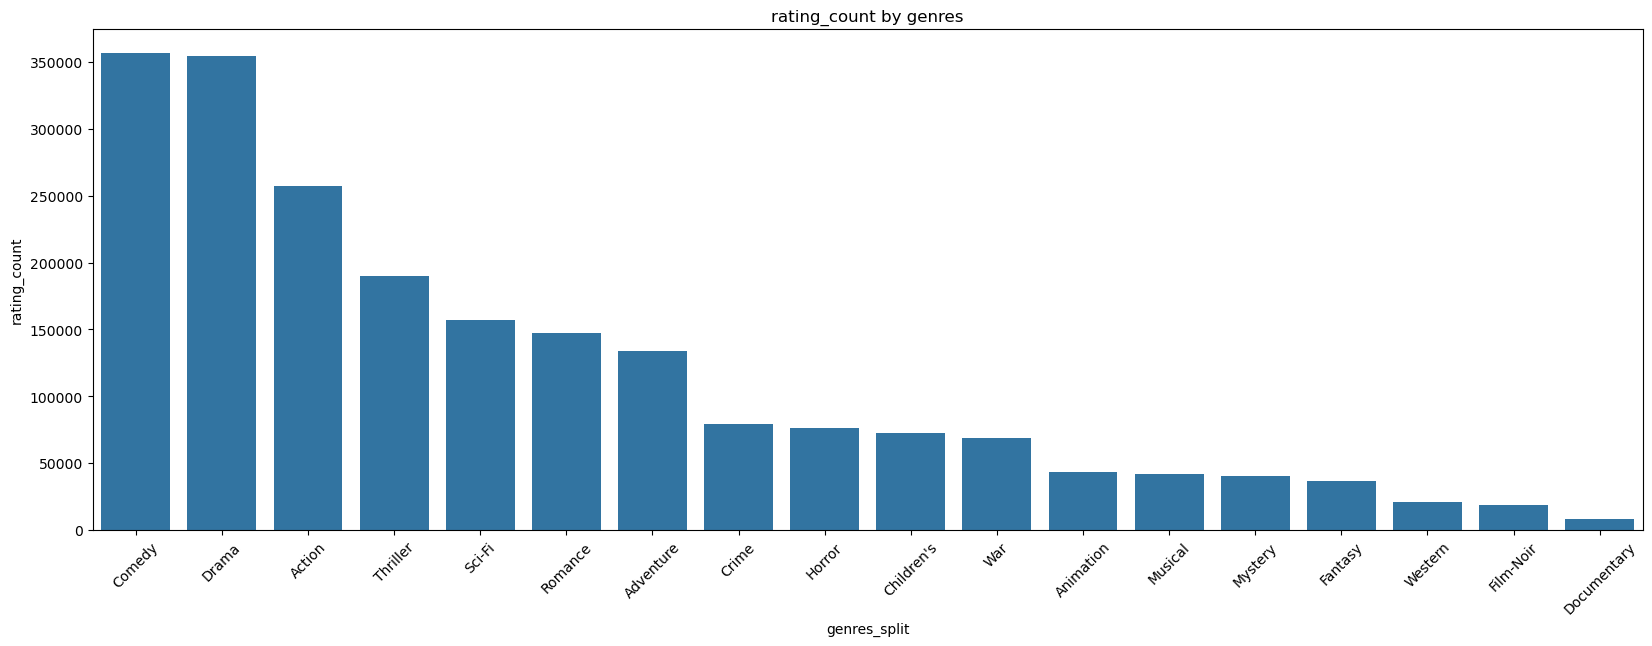

In [21]:
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('rating_count by genres')
plt.xticks(rotation=45)
plt.show()

다큐멘터리의 평점이 높지만, 평가 개수가 몇 개 없다.  
어쩌면 편향된 데이터일 수도 있겠다.

## 데이터 전처리 후 훈련용 데이터 생성

In [22]:
# Occupation 직업 
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [23]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


### 데이터 전처리
- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업
- 영화 : 영화 ID, 장르, 시기
- 평점 : 사용자 ID, 영화 ID, 평점, 시기

In [24]:
import re 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import random
plt.rc('font', family='NanumMyeongjo')

In [25]:
# 컬럼 정보 지정
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [26]:
# 데이터 불러오기 
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

In [27]:
# 사용자 데이터 확인
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [28]:
# 영화 데이터 확인
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
# 평점 데이터 확인
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### 영화 데이터 전처리

In [30]:
movies['movie_year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.head()

,movie_id,title,genres,movie_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [31]:
# 90년대 영화, 2000년대 영화 등과 같은 년대 정보를 추출
movies['movie_decade'] = movies['title'].str.extract(r'\((\d{4})\)')[0].astype(int).apply(lambda x: str(x - (x % 10)) + 's')
# title 컬럼에서 연도 정보를 빼고 제목만 따로 추출
movies['title'] = movies['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

In [32]:
movies.tail()

,movie_id,title,genres,movie_year,movie_decade
3878,3948,Meet the Parents,Comedy,2000,2000s
3879,3949,Requiem for a Dream,Drama,2000,2000s
3880,3950,Tigerland,Drama,2000,2000s
3881,3951,Two Family House,Drama,2000,2000s
3882,3952,"Contender, The",Drama|Thriller,2000,2000s


In [33]:
# | 기호를 기준으로 장르 데이터를 분리 -> 모델 input에 넣기 편리
genres_split = movies['genres'].str.split('|')

In [34]:
max_genres = genres_split.apply(len).max() 

# 각 장르별로 새로운 컬럼을 생성
for i in range(max_genres):
    movies[f'genre{i + 1}'] = genres_split.apply(lambda x: x[i] if i < len(x) else None)

# 원래 있던 장르 컬럼은 날려준다.
movies.drop('genres', axis=1, inplace=True)

# None은 공백으로 채운다.
movies.fillna('', inplace=True)

In [35]:
print(movies.shape)
movies.head()

(3883, 10)


,movie_id,title,movie_year,movie_decade,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story,1995,1990s,Animation,Children's,Comedy,,,
1,2,Jumanji,1995,1990s,Adventure,Children's,Fantasy,,,
2,3,Grumpier Old Men,1995,1990s,Comedy,Romance,,,,
3,4,Waiting to Exhale,1995,1990s,Comedy,Drama,,,,
4,5,Father of the Bride Part II,1995,1990s,Comedy,,,,,


In [36]:
set(movies['genre1'].unique().tolist() + movies['genre2'].unique().tolist() + movies['genre3'].unique().tolist())

{'',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### 평점 데이터 전처리

In [37]:
timestamp = 978300760 
dt_object = datetime.fromtimestamp(timestamp)

print(dt_object.strftime("%Y-%m-%d"))

2001-01-01


In [38]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x : datetime.fromtimestamp(x).strftime("%Y-%m-%d"))
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,2001-01-01
1,1,661,3,2001-01-01
2,1,914,3,2001-01-01
3,1,3408,4,2001-01-01
4,1,2355,5,2001-01-07


In [39]:
ratings['rating_year'] = ratings['timestamp'].apply(lambda x : x.split("-")[0]) 
ratings['rating_month'] = ratings['timestamp'].apply(lambda x : x.split("-")[1])
ratings['rating_decade'] = ratings['rating_year'].astype(int).apply(lambda x: str(x - (x % 10)) + 's')

In [40]:
ratings.head()

,user_id,movie_id,rating,timestamp,rating_year,rating_month,rating_decade
0,1,1193,5,2001-01-01,2001,01,2000s
1,1,661,3,2001-01-01,2001,01,2000s
2,1,914,3,2001-01-01,2001,01,2000s
3,1,3408,4,2001-01-01,2001,01,2000s
4,1,2355,5,2001-01-07,2001,01,2000s


In [41]:
# 임시 저장 
movies.to_csv(f"{data_path}/movies_prepro.csv", index=False)
ratings.to_csv(f"{data_path}/ratings_prepro.csv", index=False)
users.to_csv(f"{data_path}/users_prepro.csv", index=False)

### 모델 입력 데이터 생성
- 명식적 데이터(Explicit data): 사용자가 직접적으로 선호도를 표현한 데이터(예: 평점, 구독, 댓글, 리뷰, 좋아요, 싫어요, 차단 등)
- 암묵적 데이터(Implicit data): 사용자가 간접적으로 선호도를 표현한 데이터(예: 클릭 여부, 검색 기록, 방문 페이지, 마우스 움직임, 구매 내역, 시청 시간대 등)

우리는 먼저 랜덤 샘플링 기반 방법으로 '선호', '비선호'를 추출할 것이고, 순서는 아래와 같다.  
  
1. 선호 데이터를 추출한다.  
    - 사용자가 3점 이상의 점수를 부여한 영화를 '선호'한다고 가정한다.  
    - 이 데이터는 label=1인 값이다.
  
2. 비선호 데이터를 추출한다.  
2-1. 사용자가 선호했던 영화 리스트를 추출한다   
2-2. 전체 영화 중 사용자가 선호한다고 체크하지 않은 영화 리스트를 추출한다. 만약 전체 영화가 100개이고 사용자가 선호한다고 한 영화가 10개라면, 선호하지 않은 영화는 90개이다.  
2-3. 영화 리스트 중 일부를 랜덤으로 샘플링한다. 이때 선호 영화 1개당 5개의 비선호 영화를 추출한다. 예를 들어 선호 영화가 10개라면 비선호 영화는 총 50개를 추출한다. 즉 비선호 영화 90개 중 50개를 추출하는 것이다.  
2-4. 이 비선호 영화를 label=0으로 세팅한다.  

In [42]:
# 1. 3점 이상의 점수를 부여한 영화를 '선호'영화라고 가정하고, 이를 label=1로 생성
ratings = ratings[ratings['rating'] >= 3]
ratings['label'] = 1
ratings.drop('rating', axis=1, inplace=True)
print(ratings.shape)
ratings.head()

(836478, 7)


,user_id,movie_id,timestamp,rating_year,rating_month,rating_decade,label
0,1,1193,2001-01-01,2001,01,2000s,1
1,1,661,2001-01-01,2001,01,2000s,1
2,1,914,2001-01-01,2001,01,2000s,1
3,1,3408,2001-01-01,2001,01,2000s,1
4,1,2355,2001-01-07,2001,01,2000s,1


In [43]:
# 1. 사용자가 봤던(선호했던) 영화 리스트를 추출. 사용자마다 평점이 3점 이상인 영화 리스트가 구성
user_seen_movies = ratings.groupby('user_id')['movie_id'].apply(list).reset_index()
user_seen_movies.head()

,user_id,movie_id
0,1,"[1193, 661, 914, 3408, 2355, 1197, 1287, 2804,..."
1,2,"[1357, 3068, 1537, 647, 2194, 648, 2268, 2628,..."
2,3,"[3421, 648, 1394, 3534, 104, 2735, 1210, 1431,..."
3,4,"[3468, 1210, 2951, 1214, 1036, 260, 2028, 480,..."
4,5,"[2987, 2333, 1175, 39, 2337, 1535, 1392, 1466,..."


In [44]:
# 2. 먼저 고유 영화와 고유 사용자들을 가지고 온다.
unique_movies = movies['movie_id'].unique()
unique_users = users['user_id'].unique()
negative_users = []
negative_movies = []
negative_labels = []

# 사용자별로 하나씩 진행
for user in unique_users:
    # 충분한 이력이 없는 사용자는 넘어간다. 충분한 이력이 없는 사용자 데이터는 훈련에 방해가 되고 overfitting 등이 될 수 있다.
    if len(user_seen_movies[user_seen_movies['user_id'] == user]) < 1:
        continue
    # 2-1. 해당 사용자가 선호하는 영화 리스트를 가지고 온다.
    user_seen_movie_list = user_seen_movies[user_seen_movies['user_id'] == user]['movie_id'].values[0]
    # 2-2. 전체 영화 중 사용자가 선호한 영화 정보를 제외한다.
    user_non_seen_movie_list = list(set(unique_movies) - set(user_seen_movie_list))
    # 2-3. 선호 영화 1개당 비선호 영화 5개를 추출한다. 
    sample_pop_size = len(user_seen_movie_list)*5
    # 만약 비선호 영화 샘플 개수가 전체 영화 개수보다 크면, 비선호 영화 샘플 개수는 전체 영화 개수에서 사용자가 선호한 영화의 개수를 뺀 값(해당 사용자 입장에선 샘플링 최대 값)으로 설정한다.
    if len(unique_movies) - len(user_seen_movie_list) < len(user_seen_movie_list)*5 :
        sample_pop_size = len(unique_movies) - len(user_seen_movie_list)
    # 랜덤으로 추출한다. 
    user_negative_movie_list = random.sample(user_non_seen_movie_list, sample_pop_size)
    
    # 해당 값들을 리스트에 저장한다.
    negative_users += [user for _ in range(len(user_negative_movie_list))]
    negative_movies += user_negative_movie_list
    negative_labels += [0 for _ in range(len(user_negative_movie_list))]

In [45]:
print(len(negative_users))
print(len(negative_movies))
print(len(negative_labels))

4068124
4068124
4068124


In [46]:
negative_ratings_df = pd.DataFrame({'user_id' : negative_users, 'movie_id' : negative_movies, 'label':negative_labels})
print(negative_ratings_df.shape)
negative_ratings_df.head()

(4068124, 3)


,user_id,movie_id,label
0,1,3439,0
1,1,36,0
2,1,997,0
3,1,2249,0
4,1,198,0


- 평점 : 사용자 ID, 영화 ID, 레이블(label)
- 영화 : 영화 ID, 년대, 년도, 장르
- 사용자 : 사용자 ID, 성별, 나이, 지역, 직업

In [47]:
ratings_df = ratings[['user_id', 'movie_id', 'label']] 
ratings_df = pd.concat([ratings_df, negative_ratings_df], axis=0)
movies_df = movies[['movie_id', 'movie_decade', 'movie_year', 'genre1']]
movies_df.columns = ['movie_id', 'decade', 'movie_year', 'genre']
user_df = users[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [48]:
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, user_df, on='user_id')
merge_mlens_data.dropna(inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,label,decade,movie_year,genre,gender,age,occupation,zip
0,1,1193,1,1970s,1975,Drama,F,1,10,48067
1,1,661,1,1990s,1996,Animation,F,1,10,48067
2,1,914,1,1960s,1964,Musical,F,1,10,48067
3,1,3408,1,2000s,2000,Drama,F,1,10,48067
4,1,2355,1,1990s,1998,Animation,F,1,10,48067


In [49]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','decade', 'movie_year', 'genre', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(4904602, 10)


,user_id,movie_id,decade,movie_year,genre,gender,age,occupation,zip,label
0,1,1193,1970s,1975,Drama,F,1,10,48067,1
1,1,661,1990s,1996,Animation,F,1,10,48067,1
2,1,914,1960s,1964,Musical,F,1,10,48067,1
3,1,3408,2000s,2000,Drama,F,1,10,48067,1
4,1,2355,1990s,1998,Animation,F,1,10,48067,1


In [50]:
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v1.csv', index=False)

### 2. 선호도로 나누기  
사용자 정보를 무작위로 샘플링을 해서 임의로 데이터를 생성했기 때문에 샘플링하지 않고 데이터를 선호도로 나누려고 한다.
이후 모델을 훈련할 때도 이 데이터를 활용할 것이다.

In [51]:
users_df = pd.read_csv(f'{data_path}/users_prepro.csv')
ratings_df = pd.read_csv(f'{data_path}/ratings_prepro.csv')
movies_df = pd.read_csv(f'{data_path}/movies_prepro.csv')

In [52]:
print(users_df.columns)
print(ratings_df.columns)
print(movies_df.columns)

Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object')
Index(['user_id', 'movie_id', 'rating', 'timestamp', 'rating_year',
       'rating_month', 'rating_decade'],
      dtype='object')
Index(['movie_id', 'title', 'movie_year', 'movie_decade', 'genre1', 'genre2',
       'genre3', 'genre4', 'genre5', 'genre6'],
      dtype='object')


- 평점이 4점 이상인 데이터를 label=1, 나머지를 label=0
- 필요한 데이터만 추출하고 저장

In [53]:
# 1. 4점 이상인 데이터를 1로, 아닌 데이터를 0으로 설정
ratings_df['label'] = ratings_df['rating'].apply(lambda x : x >=4).astype(int)

ratings_df = ratings_df[['user_id', 'movie_id', 'rating_year','rating_month', 'rating_decade', 'label']]
ratings_df.head()

,user_id,movie_id,rating_year,rating_month,rating_decade,label
0,1,1193,2001,1,2000s,1
1,1,661,2001,1,2000s,0
2,1,914,2001,1,2000s,0
3,1,3408,2001,1,2000s,1
4,1,2355,2001,1,2000s,1


In [54]:
# 2. 필요 데이터만 가지고 온다. 특히 장르는 3개만 가지고 와서 활용.  
movies_df = movies_df[['movie_id', 'movie_decade', 'movie_year', 'genre1', 'genre2', 'genre3']]
users_df = users_df[['user_id', 'gender', 'age', 'occupation', 'zip']]

In [55]:
# 필요한 데이터를 합쳐준다.   
merge_mlens_data = pd.merge(ratings_df, movies_df, on='movie_id')
merge_mlens_data = pd.merge(merge_mlens_data, users_df, on='user_id')
merge_mlens_data.fillna('no', inplace=True)
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,rating_year,rating_month,rating_decade,label,movie_decade,movie_year,genre1,genre2,genre3,gender,age,occupation,zip
0,1,1193,2001,1,2000s,1,1970s,1975,Drama,no,no,F,1,10,48067
1,1,661,2001,1,2000s,0,1990s,1996,Animation,Children's,Musical,F,1,10,48067
2,1,914,2001,1,2000s,0,1960s,1964,Musical,Romance,no,F,1,10,48067
3,1,3408,2001,1,2000s,1,2000s,2000,Drama,no,no,F,1,10,48067
4,1,2355,2001,1,2000s,1,1990s,1998,Animation,Children's,Comedy,F,1,10,48067


In [56]:
merge_mlens_data = merge_mlens_data[['user_id', 'movie_id','movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip', 'label']]
print(merge_mlens_data.shape)
merge_mlens_data.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [57]:
# 저장
merge_mlens_data.to_csv(f'{data_path}/movielens_rcmm_v2.csv', index=False)

## AutoInt 모델 구현 및 학습

📦 추천 시스템에서 AutoInt를 쓰는 이유?  
- 모든 feature 조합을 탐색할 수 있어서 추천 정확도가 올라감
- 사람이 직접 interaction term을 설계하지 않아도 됨 (feature engineering 비용 절감)
- CTR 예측, user-item 추천에 강력한 성능을 보임 (특히 sparse한 categorical 데이터일 때)

In [58]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Layer, Dense, Dropout, BatchNormalization, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.initializers import TruncatedNormal
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy
# from sklearn.model_selection import train_test_split
# from collections import defaultdict
# import math

# # -------------------------------
# # 1. Embedding Layer
# # -------------------------------
# class FeaturesEmbedding(Layer):
#     def __init__(self, field_dims, embed_dim, **kwargs):
#         super(FeaturesEmbedding, self).__init__(**kwargs)
#         self.total_dim = sum(field_dims)
#         self.embed_dim = embed_dim
#         self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.int32)
#         self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

#     def build(self, input_shape):
#         self.embedding.build(input_shape)
#         self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

#     def call(self, x):
#         x = x + tf.constant(self.offsets, dtype=tf.int32)
#         return self.embedding(x)

# # -------------------------------
# # 2. Multi-head Attention Layer
# # -------------------------------
# class MultiHeadSelfAttention(Layer):
#     def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
#         super(MultiHeadSelfAttention, self).__init__(**kwargs)
#         self.att_embedding_size = att_embedding_size
#         self.head_num = head_num
#         self.use_res = use_res
#         self.scaling = scaling
#         self.seed = seed

#     def build(self, input_shape):
#         embedding_size = int(input_shape[-1])
#         self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
#                                        initializer=TruncatedNormal(seed=self.seed))
#         self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
#                                      initializer=TruncatedNormal(seed=self.seed + 1))
#         self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
#                                        initializer=TruncatedNormal(seed=self.seed + 2))
#         if self.use_res:
#             self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
#                                          initializer=TruncatedNormal(seed=self.seed))

#     def call(self, inputs, training=False):
#         querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))
#         keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
#         values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

#         querys = tf.stack(tf.split(querys, self.head_num, axis=2))
#         keys = tf.stack(tf.split(keys, self.head_num, axis=2))
#         values = tf.stack(tf.split(values, self.head_num, axis=2))

#         inner_product = tf.matmul(querys, keys, transpose_b=True)
#         if self.scaling:
#             inner_product /= self.att_embedding_size ** 0.5
#         normalized_att_scores = tf.nn.softmax(inner_product)
#         result = tf.matmul(normalized_att_scores, values)
#         result = tf.concat(tf.split(result, self.head_num), axis=-1)
#         result = tf.squeeze(result, axis=0)

#         if self.use_res:
#             result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
#         return tf.nn.relu(result)

# # -------------------------------
# # 3. AutoInt 본체
# # -------------------------------
# class AutoInt(Layer):
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
#                  l2_reg_dnn=0, dnn_dropout=0.4, init_std=0.0001):
#         super(AutoInt, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size
#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
#         self.int_layers = [
#             MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res)
#             for _ in range(att_layer_num)
#         ]

#     def call(self, inputs, training=False):  # <-- 중요!
#         att_input = self.embedding(inputs)
#         for layer in self.int_layers:
#             att_input = layer(att_input, training=training)
#         att_output = Flatten()(att_input)
#         att_output = self.final_layer(att_output)
#         return tf.nn.sigmoid(att_output)

# # -------------------------------
# # 4. AutoInt 모델 래퍼
# # -------------------------------
# class AutoIntModel(Model):
#     def __init__(self, field_dims, embedding_size, **kwargs):
#         super(AutoIntModel, self).__init__()
#         self.autoInt_layer = AutoInt(field_dims, embedding_size, **kwargs)

#     def call(self, inputs, training=False):
#         return self.autoInt_layer(inputs, training=training)

# # -------------------------------
# # 5. 하이퍼파라미터 및 데이터셋 설정 (예시)
# # -------------------------------
# u_i_feature = ['user_id', 'movie_id']
# meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade',
#                  'genre1', 'genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
# label = 'label'

# # field_dims: 각 필드의 고유값 개수 +1
# field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int32).values, axis=0) + 1

# # train/test split
# train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)
# x_train = train_df[u_i_feature + meta_features].values.astype(np.int32)
# y_train = train_df[label].values.astype(np.float32)

# # -------------------------------
# # 6. 모델 학습
# # -------------------------------
# embed_dim = 16
# epochs = 5
# batch_size = 2048
# dropout = 0.4
# learning_rate = 0.0001

# model = AutoIntModel(field_dims=field_dims, embedding_size=embed_dim,
#                      att_layer_num=3, att_head_num=2, att_res=True,
#                      dnn_dropout=dropout)

# optimizer = Adam(learning_rate=learning_rate)
# loss_fn = BinaryCrossentropy(from_logits=False)

# model.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

# history = model.fit(
#     x_train, y_train,
#     epochs=epochs,
#     batch_size=batch_size,
#     validation_split=0.1
# )


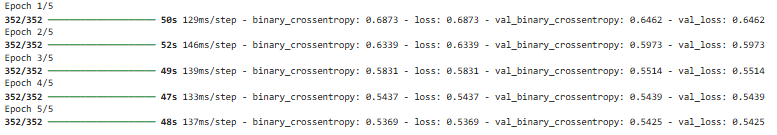

이후부터는 autoInt.ipynb 에서 실행

In [59]:
import time
import random
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import torch.nn as nn
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MaxPooling2D, Conv2D, Dropout, Lambda, Dense, Flatten, Activation, Input, Embedding, BatchNormalization
from tensorflow.keras.initializers import glorot_normal, Zeros, TruncatedNormal
from tensorflow.keras.regularizers import l2


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy


from tensorflow.keras.optimizers import Adam
from collections import defaultdict
import math

### Layer 정의

1. 임베딩 레이어
-  임베딩 레이어는 raw input 데이터를 저차원 임베딩 공간에 매핑하는 과정을 의미
- 예를 들어 성별이 남, 여가 있다면 이는 각각 0과 1로 매핑될 수 있고, 0에 해당되는 32차원 임베딩 공간, 1에 해당되는 임베딩 공간에 매핑하는 과정

2. 다층 퍼셉트론(MLP-Multilayer Perceptron, DNN 구조)
- 딥러닝을 배우면 거의 가장 먼저 배울 수 있는 구조
- 비선형 레이어를 쌓아올린 구조입니다. Dense layer를 쌓아올린 구조

3. 멀티 헤드 어텐션
- 쿼리(query), 키(key), 값(value)에 따른 어텐션을 계산하는 구조
- 본 모델에서는 셀프 어텐션 구조로 진행

### 임베딩 레이어

In [60]:
class FeaturesEmbedding(Layer):
    def __init__(self, field_dims, embed_dim, **kwargs):
        super(FeaturesEmbedding, self).__init__(**kwargs)
        self.total_dim = sum(field_dims)
        self.embed_dim = embed_dim
        self.offsets = np.array((0, *np.cumsum(field_dims)[:-1]), dtype=np.int32)
        self.embedding = tf.keras.layers.Embedding(input_dim=self.total_dim, output_dim=self.embed_dim)

    def build(self, input_shape):
        self.embedding.build(input_shape)
        self.embedding.set_weights([tf.keras.initializers.GlorotUniform()(shape=self.embedding.weights[0].shape)])

    def call(self, x):
        x = x + tf.constant(self.offsets, dtype=tf.int32)
        return self.embedding(x)

### 다층 퍼셉트론

In [61]:
class MultiLayerPerceptron(Layer):
    def __init__(self, input_dim, hidden_units, activation='relu', l2_reg=0, dropout_rate=0, use_bn=False, init_std=0.0001, output_layer=True):
        super(MultiLayerPerceptron, self).__init__()
        self.dropout_rate = dropout_rate
        self.use_bn = use_bn
        hidden_units = [input_dim] + list(hidden_units)
        if output_layer:
            hidden_units += [1]

        self.linears = [
            Dense(units, activation=None, kernel_initializer=tf.random_normal_initializer(stddev=init_std),
                  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))
            for units in hidden_units[1:]
        ]
        self.activation = tf.keras.layers.Activation(activation)
        if self.use_bn:
            self.bn = [BatchNormalization() for _ in hidden_units[1:]]
        self.dropout = Dropout(dropout_rate)

    def call(self, inputs, training=False):
        x = inputs
        for i in range(len(self.linears)):
            x = self.linears[i](x)
            if self.use_bn:
                x = self.bn[i](x, training=training)
            x = self.activation(x)
            x = self.dropout(x, training=training)
        return x

### 멀티 헤드 어텐션

In [62]:
class MultiHeadSelfAttention(Layer):
    def __init__(self, att_embedding_size=8, head_num=2, use_res=True, scaling=False, seed=1024, **kwargs):
        super(MultiHeadSelfAttention, self).__init__(**kwargs)
        self.att_embedding_size = att_embedding_size
        self.head_num = head_num
        self.use_res = use_res
        self.scaling = scaling
        self.seed = seed

    def build(self, input_shape):
        embedding_size = int(input_shape[-1])
        self.W_Query = self.add_weight(name='query', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       initializer=TruncatedNormal(seed=self.seed))
        self.W_key = self.add_weight(name='key', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                     initializer=TruncatedNormal(seed=self.seed + 1))
        self.W_Value = self.add_weight(name='value', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                       initializer=TruncatedNormal(seed=self.seed + 2))
        if self.use_res:
            self.W_Res = self.add_weight(name='res', shape=[embedding_size, self.att_embedding_size * self.head_num],
                                         initializer=TruncatedNormal(seed=self.seed))

    def call(self, inputs, training=False):
        querys = tf.tensordot(inputs, self.W_Query, axes=(-1, 0))
        keys = tf.tensordot(inputs, self.W_key, axes=(-1, 0))
        values = tf.tensordot(inputs, self.W_Value, axes=(-1, 0))

        querys = tf.stack(tf.split(querys, self.head_num, axis=2))
        keys = tf.stack(tf.split(keys, self.head_num, axis=2))
        values = tf.stack(tf.split(values, self.head_num, axis=2))

        inner_product = tf.matmul(querys, keys, transpose_b=True)
        if self.scaling:
            inner_product /= self.att_embedding_size ** 0.5
        normalized_att_scores = tf.nn.softmax(inner_product)
        result = tf.matmul(normalized_att_scores, values)
        result = tf.concat(tf.split(result, self.head_num), axis=-1)
        result = tf.squeeze(result, axis=0)

        if self.use_res:
            result += tf.tensordot(inputs, self.W_Res, axes=(-1, 0))
        return tf.nn.relu(result)

### AutoInt 모델

In [63]:
# class OldAutoInt(Layer):
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
#         super(OldAutoInt, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size
#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
#         self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res)
#                            for _ in range(att_layer_num)]

#     def call(self, inputs):
#         att_input = self.embedding(inputs)
#         for layer in self.int_layers:
#             att_input = layer(att_input)
#         att_output = Flatten()(att_input)
#         att_output = self.final_layer(att_output)
#         y_pred = tf.nn.sigmoid(att_output)
#         return y_pred

# class OldAutoIntModel(Model):
#     def __init__(self, field_dims, embedding_size, **kwargs):
#         super(OldAutoIntModel, self).__init__()
#         self.autoInt_layer = OldAutoInt(field_dims, embedding_size, **kwargs)

#     def call(self, inputs, training=False):
#         return self.autoInt_layer(inputs)

# # -------------------------------------------
# # 4b. AutoInt (최신 버전 - MLP 포함)
# # -------------------------------------------
# class NewAutoInt(Layer):
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
#                  dnn_hidden_units=[64, 32], dnn_dropout=0.4, use_bn=True, init_std=0.0001):
#         super(NewAutoInt, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size
#         self.int_layers = [
#             MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res)
#             for _ in range(att_layer_num)
#         ]
#         self.mlp = MultiLayerPerceptron(
#             input_dim=self.num_fields * self.embedding_size,
#             hidden_units=dnn_hidden_units,
#             dropout_rate=dnn_dropout,
#             use_bn=use_bn
#         )
#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))

#     def call(self, inputs, training=False):
#         x = self.embedding(inputs)
#         for layer in self.int_layers:
#             x = layer(x, training=training)
#         x = Flatten()(x)
#         x = self.mlp(x, training=training)
#         x = self.final_layer(x)
#         return tf.nn.sigmoid(x)

# class NewAutoIntModel(Model):
#     def __init__(self, field_dims, embedding_size, **kwargs):
#         super(NewAutoIntModel, self).__init__()
#         self.autoInt_layer = NewAutoInt(field_dims, embedding_size, **kwargs)

#     def call(self, inputs, training=False):
#         return self.autoInt_layer(inputs, training=training)

In [101]:
class AutoInt(Layer): 
    '''
     AutoInt 본체입니다. 앞서서 정의한 layer를 가져와서 계산을 수행합니다.
    '''
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, 
                 l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
        super(AutoInt, self).__init__()
        # 임베딩 레이어를 정의
        self.embedding = FeaturesEmbedding(field_dims, embedding_size)
        self.num_fields = len(field_dims)
        self.embedding_size = embedding_size
        # 마지막 출력 레이어를 정의
        self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        # 멀티 레이어 퍼셉트론 레이어를 정의
        self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

    def call(self, inputs):
        # input 데이터에 해당되는 embedding 값을 가져온다.
        att_input = self.embedding(inputs)
        # 멀티 헤드 셀프 어텐션 레이어에서 상호작용을 수행한다.
        for layer in self.int_layers:
            att_input = layer(att_input)

        att_output = Flatten()(att_input)
        # 최종 출력
        att_output = self.final_layer(att_output)
        # sigmoid로 예측값을 출력
        y_pred = tf.nn.sigmoid(att_output)

        return y_pred

In [65]:
# class OldAutoInt(Layer):
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True,
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
#         super(OldAutoInt, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size
#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
#         self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res)
#                            for _ in range(att_layer_num)]

#     def call(self, inputs):
#         att_input = self.embedding(inputs)
#         for layer in self.int_layers:
#             att_input = layer(att_input)
#         att_output = Flatten()(att_input)
#         att_output = self.final_layer(att_output)
#         y_pred = tf.nn.sigmoid(att_output)
#         return y_pred

# class OldAutoIntModel(Model):
#     def __init__(self, field_dims, embedding_size, **kwargs):
#         super(OldAutoIntModel, self).__init__()
#         self.autoInt_layer = OldAutoInt(field_dims, embedding_size, **kwargs)

#     def call(self, inputs, training=False):
#         return self.autoInt_layer(inputs)

In [66]:
# x_train = train_df[u_i_feature + meta_features].values.astype(np.int32)
# y_train = train_df[label].values.astype(np.float32).reshape(-1, 1)

# x_val = test_df[u_i_feature + meta_features].values.astype(np.int32)
# y_val = test_df[label].values.astype(np.float32).reshape(-1, 1)

In [67]:
# def evaluate_auc(model, x, y_true):
#     y_pred = model.predict(x, batch_size=2048)
#     auc_score = roc_auc_score(y_true, y_pred)
#     print(f"AUC score: {auc_score:.5f}")
#     return auc_score

In [68]:
# epochs=5
# learning_rate= 0.0001
# dropout= 0.4
# batch_size = 2048
# embed_dim= 16

In [69]:
# old_model = OldAutoIntModel(field_dims=field_dims, embedding_size=embed_dim,
#                            att_layer_num=3, att_head_num=2)
# old_model.compile(optimizer=Adam(learning_rate=learning_rate),
#                   loss=BinaryCrossentropy(from_logits=False),
#                   metrics=[tf.keras.metrics.AUC()])

# old_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# # 최신 버전 모델 학습
# new_model = NewAutoIntModel(
#     field_dims=field_dims,
#     embedding_size=embed_dim,
#     att_layer_num=3,
#     att_head_num=2,
#     dnn_hidden_units=[64, 32],
#     dnn_dropout=dropout,
#     use_bn=True
# )
# new_model.compile(optimizer=Adam(learning_rate=learning_rate),
#                   loss=BinaryCrossentropy(from_logits=False),
#                   metrics=[tf.keras.metrics.AUC()])

# new_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

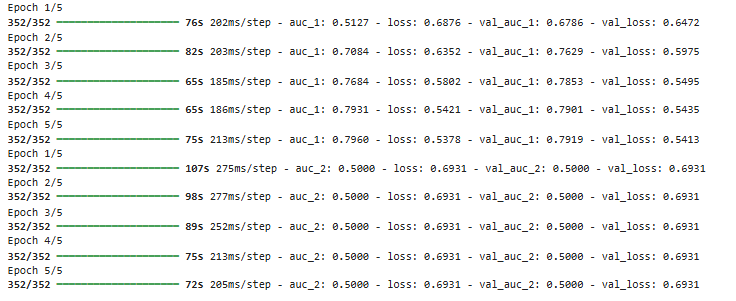

최종 선택: 노드 코드가 더 성능이 좋음

### AutoInt+ 모델 (=AutoIntMLP)

In [70]:
# class AutoIntMLP(Layer): 
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, dnn_hidden_units=(32, 32), dnn_activation='relu',
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
#         super(AutoIntMLP, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size

#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        
#         self.dnn = tf.keras.Sequential()
#         for units in dnn_hidden_units:
#             self.dnn.add(Dense(units, activation=dnn_activation,
#                                kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dnn),
#                                kernel_initializer=tf.random_normal_initializer(stddev=init_std)))
#             if dnn_use_bn:
#                 self.dnn.add(BatchNormalization())
#             self.dnn.add(Activation(dnn_activation))
#             if dnn_dropout > 0:
#                 self.dnn.add(Dropout(dnn_dropout))
#         self.dnn.add(Dense(1, kernel_initializer=tf.random_normal_initializer(stddev=init_std)))

#         self.int_layers = [MultiHeadSelfAttention(att_embedding_size=embedding_size, head_num=att_head_num, use_res=att_res) for _ in range(att_layer_num)]

#     def call(self, inputs):
#         embed_x = self.embedding(inputs)
#         dnn_embed = tf.reshape(embed_x, shape=(-1, self.embedding_size * self.num_fields))

#         att_input = embed_x
#         for layer in self.int_layers:
#             att_input = layer(att_input)

#         att_output = Flatten()(att_input)
#         att_output = self.final_layer(att_output)
        
#         dnn_output = self.dnn(dnn_embed)
#         y_pred = tf.keras.activations.sigmoid(att_output + dnn_output)
        
#         return y_pred

In [71]:
# # 파이토치 코드 
# class AutoIntMLP(nn.Module):

#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, dnn_hidden_units=(32, 32), dnn_activation='relu',
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001, device='cpu'):

#         super(AutoIntMLP, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embed_dim)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size
#         self.att_output_dim = self.num_fields * self.embedding_size
#         self.embed_output_dim = len(field_dims) * embed_dim

#         self.dnn_linear = nn.Linear(self.att_output_dim, 1, bias=False).to(device)
#         self.dnn_hidden_units = dnn_hidden_units
#         self.att_layer_num = att_layer_num
#         self.dnn = MultiLayerPerceptron(self.embed_output_dim, dnn_hidden_units,
#                            activation=dnn_activation, l2_reg=l2_reg_dnn, dropout_rate=dnn_dropout, use_bn=dnn_use_bn,
#                            init_std=init_std, output_layer=True, device=device)
#         self.int_layers = nn.ModuleList(
#             [MultiHeadSelfAttention(self.embedding_size, att_head_num, att_res, device=device) for _ in range(att_layer_num)])

#         self.to(device)

#     def forward(self, X):
#         embed_x = self.embedding(X)
#         dnn_embed = embed_x
#         att_input = embed_x
        
#         for cnt, layer in enumerate(self.int_layers):
#             att_input = layer(att_input)
            
#         att_output = torch.flatten(att_input, start_dim=1)
        
#         att_output = F.relu(self.dnn_linear(att_output))
#         # autoint MLP
#         dnn_output = self.dnn(dnn_embed.view(-1, self.embed_output_dim))
        
#         y_pred = torch.sigmoid(att_output + dnn_output)

#         return y_pred

In [72]:
# class AutoIntMLP(Layer): # tf.keras.layers.Layer 상속
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, dnn_hidden_units=(32, 32), dnn_activation='relu',
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
#         super(AutoIntMLP, self).__init__() # Keras Layer 초기화

#         # PyTorch 코드의 self.embedding = FeaturesEmbedding(field_dims, embed_dim)
#         # 여기서 embed_dim은 생성자의 embedding_size 매개변수와 동일합니다.
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size, l2_reg_embedding=l2_reg_embedding)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size # embed_dim 대신 embedding_size 사용

#         # PyTorch 코드의 self.att_output_dim 및 self.embed_output_dim
#         self.att_output_dim = self.num_fields * self.embedding_size
#         self.embed_output_dim = self.num_fields * self.embedding_size

#         # PyTorch 코드의 self.dnn_linear = nn.Linear(self.att_output_dim, 1, bias=False)
#         self.dnn_linear = Dense(1, use_bias=False,
#                                 kernel_initializer=RandomNormal(stddev=init_std),
#                                 kernel_regularizer=tf.keras.regularizers.l2(l2_reg_dnn))

#         self.dnn_hidden_units = dnn_hidden_units
#         self.att_layer_num = att_layer_num

#         # PyTorch 코드의 self.dnn = MultiLayerPerceptron(...)
#         self.dnn = MultiLayerPerceptron(
#             input_dim=self.embed_output_dim, # 임베딩 Flatten 후 차원
#             hidden_units=dnn_hidden_units,
#             activation=dnn_activation,
#             l2_reg=l2_reg_dnn,
#             dropout_rate=dnn_dropout,
#             use_bn=dnn_use_bn,
#             init_std=init_std,
#             output_layer=True # PyTorch 코드처럼 마지막에 1개 출력하는 Dense 레이어 포함
#         )

#         # PyTorch 코드의 self.int_layers = nn.ModuleList([...])
#         self.int_layers = [] # Keras Layer들은 일반 Python 리스트에 저장
#         for _ in range(att_layer_num):
#             self.int_layers.append(MultiHeadSelfAttention(self.embedding_size, att_head_num, att_res))

#         # self.to(device)는 TensorFlow에서 필요 없습니다.

#     def call(self, inputs): # PyTorch의 forward -> Keras의 call
#         # PyTorch 코드의 embed_x = self.embedding(X)
#         embed_x = self.embedding(inputs) # inputs는 tf.Tensor여야 함

#         # PyTorch 코드의 dnn_embed = embed_x
#         dnn_embed = embed_x

#         # PyTorch 코드의 att_input = embed_x
#         att_input = embed_x
        
#         # PyTorch 코드의 for cnt, layer in enumerate(self.int_layers):
#         for layer in self.int_layers: # Keras에서는 enumerate 필요 없음
#             att_input = layer(att_input)
            
#         # PyTorch 코드의 att_output = torch.flatten(att_input, start_dim=1)
#         att_output = Flatten()(att_input) # Keras Flatten Layer

#         # PyTorch 코드의 att_output = F.relu(self.dnn_linear(att_output))
#         # self.dnn_linear는 Dense(1)이므로, 이 출력이 바로 렐루에 들어갑니다.
#         att_output = self.dnn_linear(att_output) # (batch_size, 1)
#         att_output = tf.nn.relu(att_output) # ReLU 활성화

#         # PyTorch 코드의 dnn_output = self.dnn(dnn_embed.view(-1, self.embed_output_dim))
#         # dnn_embed (batch_size, num_fields, embedding_size)를 flatten
#         dnn_output = self.dnn(Flatten()(dnn_embed)) # (batch_size, 1)
        
#         # PyTorch 코드의 y_pred = torch.sigmoid(att_output + dnn_output)
#         y_pred = tf.nn.sigmoid(att_output + dnn_output)

#         return y_pred

In [73]:
# class AutoIntMLP(Layer): 
#     def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2, att_res=True, dnn_hidden_units=(32, 32), dnn_activation='relu',
#                  l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False, dnn_dropout=0.4, init_std=0.0001):
#         super(AutoIntMLP, self).__init__()
#         self.embedding = FeaturesEmbedding(field_dims, embedding_size)
#         self.num_fields = len(field_dims)
#         self.embedding_size = embedding_size

#         self.final_layer = Dense(1, use_bias=False, kernel_initializer=tf.random_normal_initializer(stddev=init_std))
        
#         self.dnn = MultiLayerPerceptron(
#             input_dim=self.num_fields * embedding_size,
#             hidden_units=dnn_hidden_units,
#             activation=dnn_activation,
#             l2_reg=l2_reg_dnn,
#             dropout_rate=dnn_dropout,
#             use_bn=dnn_use_bn,
#             init_std=init_std,
#             output_layer=True
#         )
        
#         self.int_layers = [
#             MultiHeadSelfAttention(
#                 att_embedding_size=embedding_size,
#                 head_num=att_head_num,
#                 use_res=att_res
#             )
#             for _ in range(att_layer_num)
#         ]

#     def call(self, inputs):
#             embed_x = self.embedding(inputs)  # shape: (batch_size, num_fields, embed_dim)
#             dnn_embed = tf.reshape(embed_x, shape=(-1, self.embedding_size * self.num_fields))
    
#             # Attention part
#             att_input = embed_x
#             for layer in self.int_layers:
#                 att_input = layer(att_input)
#             att_output = Flatten()(att_input)
#             att_output = tf.nn.relu(self.final_layer(att_output))  # Attention prediction
    
#             # DNN part
#             dnn_output = self.dnn(dnn_embed)  # DNN prediction
    
#             # Final prediction
#             y_pred = tf.nn.sigmoid(att_output + dnn_output)
    
#             return y_pred

### 평가지표

In [74]:
# 평가 함수는 아래의 링크에서 가져왔다.
# https://www.programcreek.com/python/?code=MaurizioFD%2FRecSys2019_DeepLearning_Evaluation%2FRecSys2019_DeepLearning_Evaluation-master%2FConferences%2FKDD%2FMCRec_our_interface%2FMCRecRecommenderWrapper.py
def get_DCG(ranklist, y_true):
    dcg = 0.0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item in y_true:
            dcg += 1.0 / math.log(i + 2)
    return  dcg

def get_IDCG(ranklist, y_true):
    idcg = 0.0
    i = 0
    for item in y_true:
        if item in ranklist:
            idcg += 1.0 / math.log(i + 2)
            i += 1
    return idcg

def get_NDCG(ranklist, y_true):
    '''NDCG 평가 지표'''
    ranklist = np.array(ranklist).astype(int)
    y_true = np.array(y_true).astype(int)
    dcg = get_DCG(ranklist, y_true)
    idcg = get_IDCG(y_true, y_true)
    if idcg == 0:
        return 0
    return round( (dcg / idcg), 5)

def get_hit_rate(ranklist, y_true):
    '''hitrate 평가 지표'''
    c = 0
    for y in y_true:
        if y in ranklist:
            c += 1
    return round( c / len(y_true), 5 )

### 모델 테스트

In [75]:
def test_model(model, test_df):
    '''모델 테스트'''
    user_pred_info = defaultdict(list)
    total_rows = len(test_df)
    for i in range(0, total_rows, batch_size):
        features = test_df.iloc[i:i + batch_size, :-1].values
        y_pred = model.predict(features, verbose=False)
        for feature, p in zip(features, y_pred):
            u_i = feature[:2]
            user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
    return user_pred_info

### 데이터 불러오기 및 세팅
1. 데이터 불러오기
2. 레이블 인코더(label encoder)를 통해 0부터 피처(feature)의 고유 개수까지 매핑
    - 예) 성별: 남(M), 여(F)를 0, 1로 변환
    - 예) 장르: 코메디, 드라마, 액션을 0, 1, 2로 변환
3. 학습(train) 데이터와 테스트(test) 데이터로 분리

In [76]:
# 1. 데이터 불러오기
# csv 데이터이므로 read_csv로 가져온다.
movielens_rcmm = pd.read_csv(f"{data_path}/movielens_rcmm_v2.csv", dtype=str)
print(movielens_rcmm.shape)
movielens_rcmm.head()

(1000209, 15)


,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,1,1193,1970s,1975,2001,1,2000s,Drama,no,no,F,1,10,48067,1
1,1,661,1990s,1996,2001,1,2000s,Animation,Children's,Musical,F,1,10,48067,0
2,1,914,1960s,1964,2001,1,2000s,Musical,Romance,no,F,1,10,48067,0
3,1,3408,2000s,2000,2001,1,2000s,Drama,no,no,F,1,10,48067,1
4,1,2355,1990s,1998,2001,1,2000s,Animation,Children's,Comedy,F,1,10,48067,1


In [77]:
# 2. 라벨 인코더(label encoder)
# sklearn의 LabelEncoder(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
# label은 제외한 각 컬럼을 돌면서 각각의 고윳값들을 0부터 n까지 매핑
label_encoders = {col: LabelEncoder() for col in movielens_rcmm.columns[:-1]} # label은 제외

for col, le in label_encoders.items():
    movielens_rcmm[col] = le.fit_transform(movielens_rcmm[col])

In [78]:
movielens_rcmm.head()

,user_id,movie_id,movie_decade,movie_year,rating_year,rating_month,rating_decade,genre1,genre2,genre3,gender,age,occupation,zip,label
0,0,189,6,55,1,0,0,7,17,15,0,0,2,1588,1
1,0,3374,8,76,1,0,0,2,2,8,0,0,2,1588,0
2,0,3615,5,44,1,0,0,11,12,15,0,0,2,1588,0
3,0,2503,9,80,1,0,0,7,17,15,0,0,2,1588,1
4,0,1374,8,78,1,0,0,2,2,2,0,0,2,1588,1


In [79]:
movielens_rcmm['label'] = movielens_rcmm['label'].astype(np.float32)

In [80]:
# 3. 학습 데이터와 테스트데이터로 분리, 0.2 정도로 분리
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800167 entries, 416292 to 121958
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        800167 non-null  int32  
 1   movie_id       800167 non-null  int32  
 2   movie_decade   800167 non-null  int32  
 3   movie_year     800167 non-null  int32  
 4   rating_year    800167 non-null  int32  
 5   rating_month   800167 non-null  int32  
 6   rating_decade  800167 non-null  int32  
 7   genre1         800167 non-null  int32  
 8   genre2         800167 non-null  int32  
 9   genre3         800167 non-null  int32  
 10  gender         800167 non-null  int32  
 11  age            800167 non-null  int32  
 12  occupation     800167 non-null  int32  
 13  zip            800167 non-null  int32  
 14  label          800167 non-null  float32
dtypes: float32(1), int32(14)
memory usage: 51.9 MB


In [82]:
# 필요 컬럼들과 레이블 정의
# 필드의 각 고유 개수를 정의하는 field_dims를 정의. 이는  임베딩 때 활용.
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade', 'genre1','genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'
field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int32).values, axis=0) + 1
field_dims

array([6040, 3706,   10,   81,    4,   12,    1,   18,   18,   16,    2,
          7,   21, 3439])

### 훈련 환경 및 모델 세팅
- 드롭아웃, 배치사이즈 등 모델 훈련, 모델 설정 등의 세팅
- 모델 정의

In [83]:
# 에포크, 학습률, 드롭아웃, 배치사이즈, 임베딩 크기 등 정의
epochs=5
learning_rate= 0.0001
dropout= 0.4
batch_size = 2048
embed_dim= 16

In [84]:
# class OldAutoIntModel(Model):
#     def __init__(self, field_dims, embedding_size, **kwargs):
#         super(OldAutoIntModel, self).__init__()
#         self.autoInt_layer = OldAutoInt(field_dims, embedding_size, **kwargs)

#     def call(self, inputs, training=False):
#         return self.autoInt_layer(inputs)

In [97]:
# AutoInt 레이어를 가지고 있는 모델 본체. 해당 모델을 활용해 훈련을 진행. 
class AutoIntModel(Model):
    def __init__(self, field_dims, embedding_size, att_layer_num=3, att_head_num=2
                 , att_res=True, l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                 , dnn_dropout=0, init_std=0.0001):
        super(AutoIntModel, self).__init__()
        self.autoInt_layer = AutoInt(field_dims, embedding_size, att_layer_num=att_layer_num, att_head_num=att_head_num, 
                                     att_res=att_res, l2_reg_dnn=l2_reg_dnn, dnn_dropout=dnn_dropout, init_std=init_std
                                    )

    def call(self, inputs, training=False):
        return self.autoInt_layer(inputs, training=False)

In [98]:
u_i_feature = ['user_id', 'movie_id']
meta_features = ['movie_decade', 'movie_year', 'rating_year', 'rating_month', 'rating_decade',
                 'genre1', 'genre2', 'genre3', 'gender', 'age', 'occupation', 'zip']
label = 'label'

# field_dims: 각 필드의 고유값 개수 +1
field_dims = np.max(movielens_rcmm[u_i_feature + meta_features].astype(np.int32).values, axis=0) + 1

# train/test split
train_df, test_df = train_test_split(movielens_rcmm, test_size=0.2, random_state=42)
x_train = train_df[u_i_feature + meta_features].values.astype(np.int32)
y_train = train_df[label].values.astype(np.float32).reshape(-1, 1) 

In [99]:
embed_dim = 16
epochs = 5
batch_size = 2048
dropout = 0.4
learning_rate = 0.0001

In [105]:
autoInt = AutoIntModel(field_dims, embed_dim, att_layer_num=3, att_head_num=2, att_res=True,
                             l2_reg_dnn=0, l2_reg_embedding=1e-5, dnn_use_bn=False
                             , dnn_dropout=dropout, init_std=0.0001)


In [106]:
optimizer = Adam(learning_rate=learning_rate)
loss_fn = BinaryCrossentropy(from_logits=False)

In [107]:
autoInt.compile(optimizer=optimizer, loss=loss_fn, metrics=['binary_crossentropy'])

In [108]:
history = autoInt.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1
)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - binary_crossentropy: 0.6874 - loss: 0.6874 - val_binary_crossentropy: 0.6475 - val_loss: 0.6475
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - binary_crossentropy: 0.6349 - loss: 0.6349 - val_binary_crossentropy: 0.5950 - val_loss: 0.5950
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - binary_crossentropy: 0.5793 - loss: 0.5793 - val_binary_crossentropy: 0.5506 - val_loss: 0.5506
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - binary_crossentropy: 0.5434 - loss: 0.5434 - val_binary_crossentropy: 0.5437 - val_loss: 0.5437
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - binary_crossentropy: 0.5356 - loss: 0.5356 - val_binary_crossentropy: 0.5411 - val_loss: 0.5411


### 훈련 및 평가

In [109]:
x_train = train_df[u_i_feature + meta_features].values  # (int32)
y_train = train_df[label].values  # (float32)

In [110]:
print("x_train dtype:", x_train.dtype)
print("y_train dtype:", y_train.dtype)

x_train dtype: int32
y_train dtype: float32


#### Error 해결 요약 정리

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[217], line 1
----> 1 history = autoInt_model.fit(x_train, y_train,
      2                             epochs=epochs,
      3                             batch_size=batch_size,
      4                             validation_split=0.1)

File C:\추천시스템\recS-env\lib\site-packages\keras\utils\traceback_utils.py:67, in filter_traceback.<locals>.error_handler(*args, **kwargs)
     65 except Exception as e:  # pylint: disable=broad-except
     66   filtered_tb = _process_traceback_frames(e.__traceback__)
---> 67   raise e.with_traceback(filtered_tb) from None
     68 finally:
     69   del filtered_tb

File ~\AppData\Local\Temp\__autograph_generated_filepxk_7g32.py:15, in outer_factory.<locals>.inner_factory.<locals>.tf__train_function(iterator)
     13 try:
     14     do_return = True
---> 15     retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
     16 except:
     17     do_return = False

File ~\AppData\Local\Temp\__autograph_generated_filebwkp6c44.py:12, in outer_factory.<locals>.inner_factory.<locals>.tf__call(self, inputs, training)
     10 try:
     11     do_return = True
---> 12     retval_ = ag__.converted_call(ag__.ld(self).autoInt_layer, (ag__.ld(inputs),), dict(training=ag__.ld(training)), fscope)
     13 except:
     14     do_return = False

File ~\AppData\Local\Temp\__autograph_generated_file_1qv65gc.py:10, in outer_factory.<locals>.inner_factory.<locals>.tf__call(self, inputs)
      8 do_return = False
      9 retval_ = ag__.UndefinedReturnValue()
---> 10 att_input = ag__.converted_call(ag__.ld(self).embedding, (ag__.ld(inputs),), None, fscope)
     12 def get_state():
     13     return (att_input,)

File ~\AppData\Local\Temp\__autograph_generated_filehi84vd4g.py:10, in outer_factory.<locals>.inner_factory.<locals>.tf__call(self, x)
      8 do_return = False
      9 retval_ = ag__.UndefinedReturnValue()
---> 10 x = (ag__.ld(x) + ag__.converted_call(ag__.ld(tf).constant, (ag__.ld(self).offsets,), None, fscope))
     11 try:
     12     do_return = True

TypeError: in user code:

    File "C:\추천시스템\recS-env\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\추천시스템\recS-env\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\추천시스템\recS-env\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\추천시스템\recS-env\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\추천시스템\recS-env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_filebwkp6c44.py", line 12, in tf__call
        retval_ = ag__.converted_call(ag__.ld(self).autoInt_layer, (ag__.ld(inputs),), dict(training=ag__.ld(training)), fscope)
    File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_file_1qv65gc.py", line 10, in tf__call
        att_input = ag__.converted_call(ag__.ld(self).embedding, (ag__.ld(inputs),), None, fscope)
    File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_filehi84vd4g.py", line 10, in tf__call
        x = (ag__.ld(x) + ag__.converted_call(ag__.ld(tf).constant, (ag__.ld(self).offsets,), None, fscope))

    TypeError: Exception encountered when calling layer "auto_int_model" (type AutoIntModel).
    
    in user code:
    
        File "C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17864\2061189285.py", line 12, in call  *
            return self.autoInt_layer(inputs, training=training)
        File "C:\추천시스템\recS-env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_file_1qv65gc.py", line 10, in tf__call
            att_input = ag__.converted_call(ag__.ld(self).embedding, (ag__.ld(inputs),), None, fscope)
        File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_filehi84vd4g.py", line 10, in tf__call
            x = (ag__.ld(x) + ag__.converted_call(ag__.ld(tf).constant, (ag__.ld(self).offsets,), None, fscope))
    
        TypeError: Exception encountered when calling layer "auto_int" (type AutoInt).
        
        in user code:
        
            File "C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17864\3522908423.py", line 19, in call  *
                att_input = self.embedding(inputs)
            File "C:\추천시스템\recS-env\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "C:\Users\juwonhee\AppData\Local\Temp\__autograph_generated_filehi84vd4g.py", line 10, in tf__call
                x = (ag__.ld(x) + ag__.converted_call(ag__.ld(tf).constant, (ag__.ld(self).offsets,), None, fscope))
        
            TypeError: Exception encountered when calling layer "features_embedding" (type FeaturesEmbedding).
            
            in user code:
            
                File "C:\Users\juwonhee\AppData\Local\Temp\ipykernel_17864\2392726075.py", line 21, in call  *
                    x = x + tf.constant(self.offsets)
            
                TypeError: Input 'y' of 'AddV2' Op has type int64 that does not match type int32 of argument 'x'.
            
            
            Call arguments received by layer "features_embedding" (type FeaturesEmbedding):
              • x=tf.Tensor(shape=(None, 14), dtype=int32)
        
        
        Call arguments received by layer "auto_int" (type AutoInt):
          • inputs=tf.Tensor(shape=(None, 14), dtype=int32)
    
    
    Call arguments received by layer "auto_int_model" (type AutoIntModel):
      • inputs=tf.Tensor(shape=(None, 14), dtype=int32)
      • training=True

self.offsets가 아직 NumPy 배열 (np.array) 상태여서 tf.Tensor가 아니었고, 이걸 call 안에서 tf.constant()로 변환해서 더해줘야 했었다.
  
하지만 지금 출력 결과 보니 self.offsets가 여전히 NumPy 배열인데도 x + self.offsets 연산에서 문제가 안 나고 잘 된다는 건, 아마도 TensorFlow가 자동으로 NumPy 배열을 텐서로 변환해주면서 dtype도 맞춰서 연산을 해줬기 때문이다.  
그래서 예전엔 오류가 났지만, 지금은 내부 처리에서 호환되게 바뀌었을 가능성이 크다.

In [111]:
# 사용자에게 예측된 정보를 저장하는 딕셔너리 
user_pred_info = {}
# top10개
top = 10
# 테스트 값을 가지고 온다.
mymodel_user_pred_info = test_model(autoInt_model, test_df)
# 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져온다. 
for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
    ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
    ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
    user_pred_info[str(user)] = ranklist
# 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져온다.
test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

C:\Users\juwonhee\AppData\Local\Temp\ipykernel_9288\2567990266.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  user_pred_info[int(u_i[0])].append((int(u_i[1]), float(p)))
100%|███████████████████████████████████████████████████████████████████████████| 6038/6038 [00:00<00:00, 54823.11it/s]


In [112]:
# # 사용자에게 예측된 정보를 저장하는 딕셔너리 
# user_pred_info = {}
# # top10개
# top = 10
# # 테스트 값을 가지고 온다.
# mymodel_user_pred_info = test_model(autoIntMLP_model, test_df)
# # 사용자마다 돌면서 예측 데이터 중 가장 높은 top 10만 가져온다. 
# for user, data_info in tqdm(mymodel_user_pred_info.items(), total=len(mymodel_user_pred_info), position=0, leave=True):
#     ranklist = sorted(data_info, key=lambda s : s[1], reverse=True)[:top]
#     ranklist = list(dict.fromkeys([r[0] for r in ranklist]))
#     user_pred_info[str(user)] = ranklist
# # 원본 테스트 데이터에서 label이 1인 사용자 별 영화 정보를 가져온다.
# test_data = test_df[test_df['label']==1].groupby('user_id')['movie_id'].apply(list)

In [113]:
mymodel_ndcg_result = {}
mymodel_hitrate_result = {}

# 모델 예측값과 원본 테스트 데이터를 비교해서 어느정도 성능이 나왔는지 NDCG와 Hitrate를 비교

# NDCG
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # NDCG 값 구하기
    user_ndcg = get_NDCG(mymodel_pred, testset)

    mymodel_ndcg_result[user] = user_ndcg

# Hitrate
for user, data_info in tqdm(test_data.items(), total=len(test_data), position=0, leave=True):
    mymodel_pred = user_pred_info.get(str(user))

    testset = list(set(np.array(data_info).astype(int)))
    mymodel_pred = mymodel_pred[:top]

    # hitrate 값 구하기
    user_hitrate = get_hit_rate(mymodel_pred, testset)

    # 사용자 hitrate 결과 저장
    mymodel_hitrate_result[user] = user_hitrate

100%|███████████████████████████████████████████████████████████████████████████| 5994/5994 [00:00<00:00, 55530.75it/s]


In [114]:
print(" mymodel ndcg : ", round(np.mean(list(mymodel_ndcg_result.values())), 5))
print(" mymodel hitrate : ", round(np.mean(list(mymodel_hitrate_result.values())), 5))

 mymodel ndcg :  0.56723
 mymodel hitrate :  0.57685


### 저장

In [115]:
import os
import numpy as np

save_path = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autoint'

In [116]:
np.save(os.path.join(save_path, 'field_dims.npy'), field_dims)

In [117]:
# import os
# import numpy as np

# save_path = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autointMLP'

In [118]:
# np.save(os.path.join(save_path, 'MLP_field_dims.npy'), field_dims)

In [120]:
import os

save_dir = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autoint\model'

autoInt_model.save_weights(os.path.join(save_dir, 'autoInt_model.weights.h5'))

In [121]:
# import os

# save_dir = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autointMLP\model'
# os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

# autoInt_model.save_weights(os.path.join(save_dir, 'autoIntMLP_model_weights.h5'))

In [122]:
import os
import joblib

save_dir = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autoint\data'

file_path = os.path.join(save_dir, 'label_encoders.pkl')
joblib.dump(label_encoders, file_path)

['C:\\추천시스템\\Project\\딥러닝 기반 영화 추천 프로젝트\\autoint\\data\\label_encoders.pkl']

In [123]:
# import os
# import joblib

# save_dir = r'C:\추천시스템\Project\딥러닝 기반 영화 추천 프로젝트\autointMLP'

# file_path = os.path.join(save_dir, 'MLP_label_encoders.pkl')
# joblib.dump(label_encoders, file_path)